# Introduction

In this dataset, we will try to answer a few question during the EDA process.

### Key questions to answer

# Importing necessary libraries

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Loading data

In [195]:
df = pd.read_csv("top_1000_most_swapped_books.csv")
df.head()

,id,title,author,genre,language,publicationYear,publisher,description,pageCount,tags,rating_average,most_popular_country,bestseller_status,awards,age_category,adapted_to_movie,movie_release_year,isbn
0,1,Harry Potter and the Sorcerer's Stone,J.K. Rowling,Fantasy,English,1997,Bloomsbury,A young wizard discovers his magical heritage ...,309,"magic,school,adventure",4.89,UK,True,"Smarties Prize,British Book Award",Children,True,2001.0,978-0747532743
1,2,To Kill a Mockingbird,Harper Lee,Southern Gothic,English,1960,J.B. Lippincott & Co.,A lawyer in the Depression-era South defends a...,281,"classic,law,racism,history",4.85,USA,True,Pulitzer Prize,Adult,True,1962.0,978-0061120084
2,3,1984,George Orwell,Dystopian,English,1949,Secker & Warburg,A dystopian social science fiction novel and c...,328,"politics,scifi,totalitarianism",4.80,UK,True,Prometheus Hall of Fame,Adult,True,1984.0,978-0451524935
3,4,The Great Gatsby,F. Scott Fitzgerald,Tragedy,English,1925,Charles Scribner's Sons,A story of the fabulously wealthy Jay Gatsby a...,180,"classic,wealth,romance,jazz age",4.40,USA,True,None,Adult,True,2013.0,978-0743273565
4,5,The Hobbit,J.R.R. Tolkien,Fantasy,English,1937,George Allen & Unwin,"Bilbo Baggins, a hobbit, is swept into an epic...",310,"adventure,dragons,magic",4.75,UK,True,Keith Barker Millennium Book Award,Children,True,2012.0,978-0547928227


# Quick data overview

In [196]:
df.describe()

,id,publicationYear,pageCount,rating_average,movie_release_year
count,990.000000,990.000000,990.000000,990.000000,642.000000
mean,502.079798,1962.996970,378.904040,4.061949,1997.704050
std,289.286296,195.433466,190.567626,0.241120,22.531925
min,1.000000,-750.000000,22.000000,3.140000,1926.000000
25%,252.250000,1965.250000,256.000000,3.920000,1987.000000
50%,503.500000,1997.000000,341.500000,4.070000,2005.000000
75%,752.750000,2010.000000,452.750000,4.220000,2015.000000
max,1003.000000,2023.000000,1463.000000,4.950000,2025.000000


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    990 non-null    int64  
 1   title                 990 non-null    object 
 2   author                990 non-null    object 
 3   genre                 990 non-null    object 
 4   language              990 non-null    object 
 5   publicationYear       990 non-null    int64  
 6   publisher             990 non-null    object 
 7   description           990 non-null    object 
 8   pageCount             990 non-null    int64  
 9   tags                  990 non-null    object 
 10  rating_average        990 non-null    float64
 11  most_popular_country  990 non-null    object 
 12  bestseller_status     990 non-null    bool   
 13  awards                986 non-null    object 
 14  age_category          990 non-null    object 
 15  adapted_to_movie      9

In [198]:
df.columns

Index(['id', 'title', 'author', 'genre', 'language', 'publicationYear',
       'publisher', 'description', 'pageCount', 'tags', 'rating_average',
       'most_popular_country', 'bestseller_status', 'awards', 'age_category',
       'adapted_to_movie', 'movie_release_year', 'isbn'],
      dtype='object')

In [199]:
df.isna().sum()

id                        0
title                     0
author                    0
genre                     0
language                  0
publicationYear           0
publisher                 0
description               0
pageCount                 0
tags                      0
rating_average            0
most_popular_country      0
bestseller_status         0
awards                    4
age_category              0
adapted_to_movie          0
movie_release_year      348
isbn                      0
dtype: int64

In [200]:
df.duplicated().sum()

0

In [201]:
for col in df.select_dtypes(exclude=[np.number]).columns:
    print("="*3+col+"="*3)
    print(f"number of unique values: {df[col].nunique()}")
    print(list(df.groupby(col).size().sort_values(ascending=False).head(5).index))

===title===
number of unique values: 990
['11/22/63', 'The Couple Next Door', 'The Crucible', 'The Cruel Prince', 'The Crying of Lot 49']
===author===
number of unique values: 555
['Stephen King', 'Terry Pratchett', 'Neil Gaiman', 'Michael Crichton', 'J.K. Rowling']
===genre===
number of unique values: 81
['Fantasy', 'Sci-Fi', 'Historical Fiction', 'Fiction', 'Thriller']
===language===
number of unique values: 13
['English', 'German', 'Japanese', 'French', 'Norwegian']
===publisher===
number of unique values: 297
['Doubleday', 'Knopf', 'Simon & Schuster', 'Viking', 'Little, Brown']
===description===
number of unique values: 990
['35 girls compete for the heart of a prince in a caste-based society.', 'Four best friends share a pair of jeans that fits them all perfectly over a summer.', 'Four famous siblings throw an epic party in 1983 Malibu that ends in fire.', 'Four friends are tormented by an anonymous stalker after their leader disappears.', 'Four seekers arrive at a notoriously unf

# Dealing with NULL values

```movie_release_year``` is a numerical column, we can fill the null values with the mean.

In [202]:
df["movie_release_year"] = df["movie_release_year"].fillna(round(df["movie_release_year"].mean(), 0))
df["movie_release_year"].isna().sum()

0

For the ```awards``` column, we can fill it out with the mode. Although not every book might earn an award.

In [203]:
df.groupby("awards").size().sort_values(ascending=False).head(5)

awards
None                        602
Goodreads Choice Award       43
Pulitzer Prize               29
Locus Award                  17
Goodreads Choice Nominee     16
dtype: int64

Seems like "None" is the most frequent.

In [204]:
df["awards"] = df["awards"].fillna("None")
df.isna().sum().sum()

0

# Simplify dataset

Some columns are not in their respected data type.

In [205]:
df["movie_release_year"] = df["movie_release_year"].astype("Int64")
df['bestseller_status'] = df['bestseller_status'].astype(bool)
df['adapted_to_movie']  = df['adapted_to_movie'].astype(bool)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    990 non-null    int64  
 1   title                 990 non-null    object 
 2   author                990 non-null    object 
 3   genre                 990 non-null    object 
 4   language              990 non-null    object 
 5   publicationYear       990 non-null    int64  
 6   publisher             990 non-null    object 
 7   description           990 non-null    object 
 8   pageCount             990 non-null    int64  
 9   tags                  990 non-null    object 
 10  rating_average        990 non-null    float64
 11  most_popular_country  990 non-null    object 
 12  bestseller_status     990 non-null    bool   
 13  awards                990 non-null    object 
 14  age_category          990 non-null    object 
 15  adapted_to_movie      9

# Drop unecessary columns

In [206]:
df.drop(["id", "description", "isbn", ], inplace=True, axis=1)
df.columns

Index(['title', 'author', 'genre', 'language', 'publicationYear', 'publisher',
       'pageCount', 'tags', 'rating_average', 'most_popular_country',
       'bestseller_status', 'awards', 'age_category', 'adapted_to_movie',
       'movie_release_year'],
      dtype='object')

# Save cleaned data to use later for dahsboard

In [207]:
# df.to_csv("Cleaned Popular Books For Exchanging.csv")

# Visualization

### 1. Which genres have the highest average rating?

In [208]:
df1 = (
    df.groupby("genre")
    .agg(
        rating_average=("rating_average", lambda x: round(x.mean(), 2)),
        count=("genre", "size")
    )
    .sort_values("rating_average", ascending=False)
    .reset_index()
    )
#filter out genres with low count
df1 = df1[df1["count"] >= 10].head(10)
df1

,genre,rating_average,count
5,Non-fiction,4.27,13
7,Memoir,4.24,24
15,Fantasy,4.18,155
21,Historical Fiction,4.13,75
23,Children's Fiction,4.13,47
27,Dystopian,4.11,31
28,Crime,4.11,14
34,Mystery,4.08,30
38,Sci-Fi,4.07,91
40,Philosophy,4.04,15


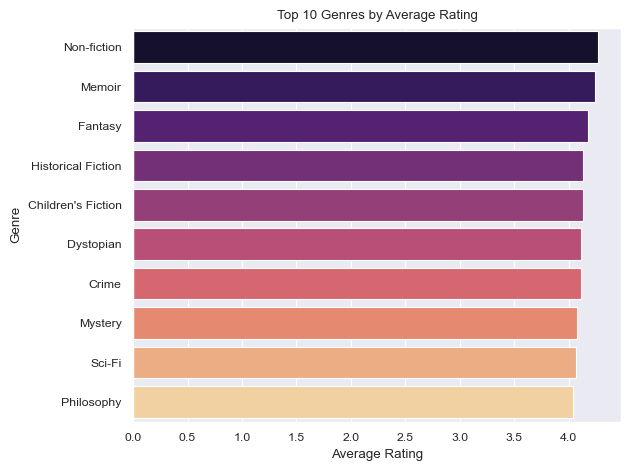

In [209]:
sns.set_style("darkgrid")
sns.set_theme("paper")
sns.barplot(data=df1, x="rating_average", y="genre", palette="magma")
plt.title("Top 10 Genres by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

- Non-fiction genre has the highest average rating.

### 2. Which publishers yield the highest average rating?

In [210]:
df2 = (
    df.groupby("publisher")
    .agg(
        rating_average=("rating_average", lambda x: round(x.mean(), 2)),
        count=("publisher", "size")
    )
    .sort_values("rating_average", ascending=False)
    .reset_index()
    )
#filter out genres with low count
df2 = df2[df2["count"] >= 15].head(10)
df2

,publisher,rating_average,count
15,Bloomsbury,4.36,17
75,Tor Books,4.18,17
89,Gollancz,4.15,19
123,Simon & Schuster,4.10,35
130,Random House,4.09,26
136,Doubleday,4.08,48
141,Putnam,4.07,17
152,Scribner,4.04,21
165,Knopf,4.03,46
167,HarperCollins,4.02,22


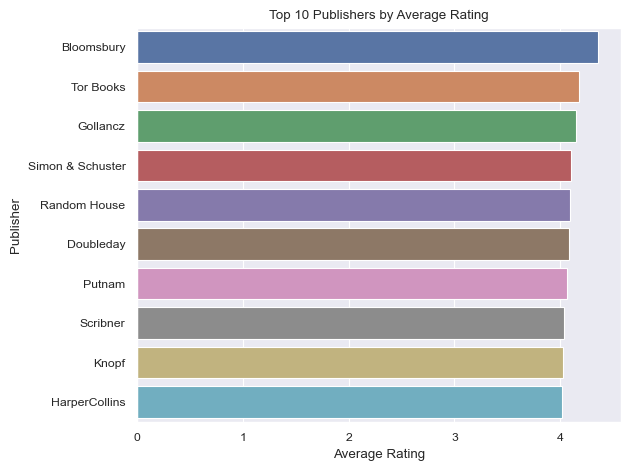

In [211]:
sns.barplot(data=df2, x="rating_average", y="publisher", palette="deep")
plt.title("Top 10 Publishers by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Publisher")
plt.tight_layout()
plt.show()

- Bloomsbury is the publisher wiht the highest average rating

### 3. Who are the most prolific authors and how do their average ratings compare?

In [212]:
df3 = (
    df.groupby("author")
    .agg(
        rating_average=("rating_average", lambda x: round(x.mean(), 2)),
        book_count=("author", "size")
    )
    .sort_values("book_count", ascending=False)
    .head(10)
    .reset_index()
    )
df3

,author,rating_average,book_count
0,Stephen King,4.01,26
1,Terry Pratchett,4.23,14
2,Neil Gaiman,4.11,12
3,Michael Crichton,3.79,9
4,J.K. Rowling,4.46,9
5,Kurt Vonnegut,4.08,8
6,John Grisham,3.94,7
7,Dan Brown,3.85,7
8,Nicholas Sparks,4.06,7
9,Andrzej Sapkowski,4.24,6


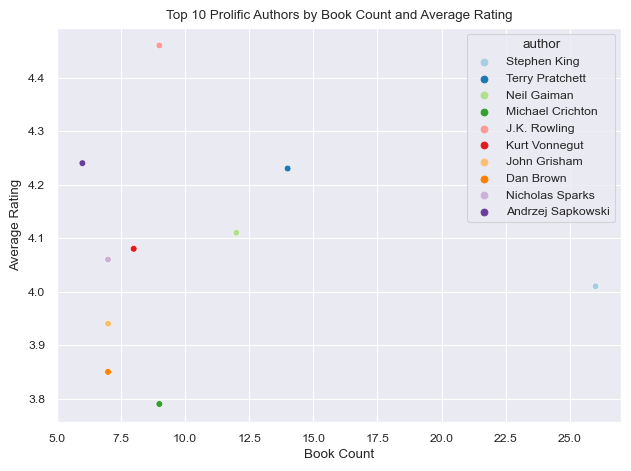

In [213]:
sns.scatterplot(data=df3, x="book_count", y="rating_average", hue="author", palette="Paired")
plt.title("Top 10 Prolific Authors by Book Count and Average Rating")
plt.xlabel("Book Count")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.show()

- Stephen King is by far the most prolific author, outpacing all others.
- Although some authors have published more than five books, their average ratings remain low, suggesting not every title becomes a hit.

### 4. How do ratings differ by age category?

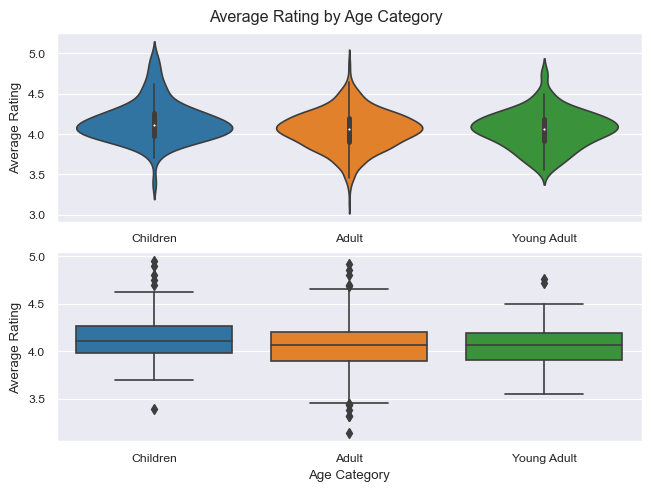

In [218]:
fig, ax = plt.subplots(2, 1, constrained_layout=True)
sns.violinplot(data=df, x="age_category", y="rating_average", ax=ax[0], palette="tab10")
sns.boxplot(data=df, x="age_category", y="rating_average", ax=ax[1], palette="tab10")
ax[0].set_xlabel("")
ax[0].set_ylabel("Average Rating")
ax[1].set_ylabel("Average Rating")
ax[1].set_xlabel("Age Category")
fig.suptitle("Average Rating by Age Category")
plt.show()

- The median rating in the children age category is slightly higher than in the other two categories, and a few outliers reach a perfect 5.0 average.

### 5. Are award winning books more likely to have higher rating average?

In [224]:
df5 = df.copy()
df5["has_awards"] = df5["awards"].apply(lambda x: "No" if x == "None" else "Yes")
df5 = (
    df5.groupby("has_awards")["rating_average"]
    .mean()
    .round(2)
    .reset_index()
    )
df5

,has_awards,rating_average
0,No,4.03
1,Yes,4.12


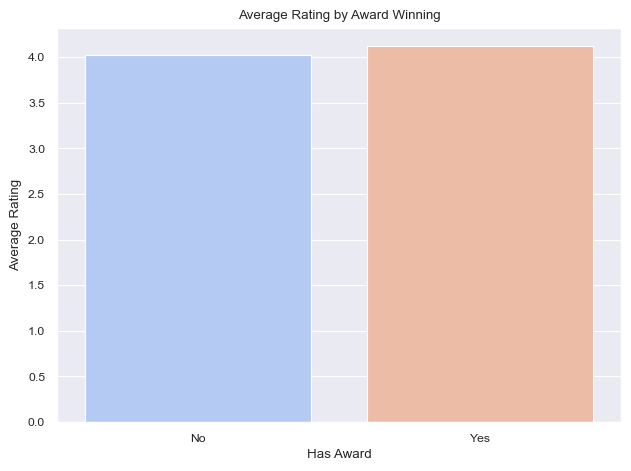

In [227]:
sns.barplot(data=df5, x="has_awards", y="rating_average", palette="coolwarm")
plt.title("Average Rating by Award Winning")
plt.xlabel("Has Award")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.show()

- Books that win awards tend to be rated a bit higher on average.